In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df1 = pd.read_csv('last&final_df.csv')

In [5]:
df1

,Unnamed: 0,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,42445,New Zealand,Pakistan,Dubai,117,19,5,6.950495,38.0,135
1,32756,West Indies,Sri Lanka,Pallekele,20,84,8,3.333333,17.0,129
2,33507,India,South Africa,Colombo,46,75,7,6.133333,28.0,152
3,17197,India,England,Durban,47,81,10,7.230769,35.0,218
4,3523,Afghanistan,West Indies,St Kitts,74,45,7,5.920000,21.0,146
...,...,...,...,...,...,...,...,...,...,...
38472,48662,England,Sri Lanka,Delhi,100,29,7,6.593407,35.0,171
38473,33021,Pakistan,India,Colombo,50,69,6,5.882353,21.0,128
38474,25026,New Zealand,Pakistan,Barbados,73,50,6,6.257143,28.0,133
38475,47777,Bangladesh,Australia,Bangalore,65,58,7,6.290323,39.0,156


In [7]:
df1.drop(['Unnamed: 0'] ,axis = 1)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,New Zealand,Pakistan,Dubai,117,19,5,6.950495,38.0,135
1,West Indies,Sri Lanka,Pallekele,20,84,8,3.333333,17.0,129
2,India,South Africa,Colombo,46,75,7,6.133333,28.0,152
3,India,England,Durban,47,81,10,7.230769,35.0,218
4,Afghanistan,West Indies,St Kitts,74,45,7,5.920000,21.0,146
...,...,...,...,...,...,...,...,...,...
38472,England,Sri Lanka,Delhi,100,29,7,6.593407,35.0,171
38473,Pakistan,India,Colombo,50,69,6,5.882353,21.0,128
38474,New Zealand,Pakistan,Barbados,73,50,6,6.257143,28.0,133
38475,Bangladesh,Australia,Bangalore,65,58,7,6.290323,39.0,156


In [13]:
encoded_df=pd.get_dummies(df1,columns=['batting_team','bowling_team'])

In [14]:
encoded_df

,Unnamed: 0,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Afghanistan,batting_team_Australia,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies
0,42445,Dubai,117,19,5,6.950495,38.0,135,0,0,...,0,0,0,0,0,0,1,0,0,0
1,32756,Pallekele,20,84,8,3.333333,17.0,129,0,0,...,0,0,0,0,0,0,0,0,1,0
2,33507,Colombo,46,75,7,6.133333,28.0,152,0,0,...,0,0,0,0,0,0,0,1,0,0
3,17197,Durban,47,81,10,7.230769,35.0,218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3523,St Kitts,74,45,7,5.920000,21.0,146,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38472,48662,Delhi,100,29,7,6.593407,35.0,171,0,0,...,0,0,0,0,0,0,0,0,1,0
38473,33021,Colombo,50,69,6,5.882353,21.0,128,0,0,...,0,0,0,0,1,0,0,0,0,0
38474,25026,Barbados,73,50,6,6.257143,28.0,133,0,0,...,0,0,0,0,0,0,1,0,0,0
38475,47777,Bangalore,65,58,7,6.290323,39.0,156,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
encoded_df.columns

Index(['Unnamed: 0', 'city', 'current_score', 'balls_left', 'wickets_left',
       'crr', 'last_five', 'runs_x', 'batting_team_Afghanistan',
       'batting_team_Australia', 'batting_team_Bangladesh',
       'batting_team_England', 'batting_team_India',
       'batting_team_New Zealand', 'batting_team_Pakistan',
       'batting_team_South Africa', 'batting_team_Sri Lanka',
       'batting_team_West Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New Zealand', 'bowling_team_Pakistan',
       'bowling_team_South Africa', 'bowling_team_Sri Lanka',
       'bowling_team_West Indies'],
      dtype='object')

In [16]:
encoded_df2=encoded_df[['Unnamed: 0', 'city', 'current_score', 'balls_left', 'wickets_left',
       'crr', 'last_five', 'runs_x', 'batting_team_Afghanistan',
       'batting_team_Australia', 'batting_team_Bangladesh',
       'batting_team_England', 'batting_team_India',
       'batting_team_New Zealand', 'batting_team_Pakistan',
       'batting_team_South Africa', 'batting_team_Sri Lanka',
       'batting_team_West Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New Zealand', 'bowling_team_Pakistan',
       'bowling_team_South Africa', 'bowling_team_Sri Lanka',
       'bowling_team_West Indies']]

In [17]:
encoded_df2

,Unnamed: 0,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Afghanistan,batting_team_Australia,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies
0,42445,Dubai,117,19,5,6.950495,38.0,135,0,0,...,0,0,0,0,0,0,1,0,0,0
1,32756,Pallekele,20,84,8,3.333333,17.0,129,0,0,...,0,0,0,0,0,0,0,0,1,0
2,33507,Colombo,46,75,7,6.133333,28.0,152,0,0,...,0,0,0,0,0,0,0,1,0,0
3,17197,Durban,47,81,10,7.230769,35.0,218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3523,St Kitts,74,45,7,5.920000,21.0,146,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38472,48662,Delhi,100,29,7,6.593407,35.0,171,0,0,...,0,0,0,0,0,0,0,0,1,0
38473,33021,Colombo,50,69,6,5.882353,21.0,128,0,0,...,0,0,0,0,1,0,0,0,0,0
38474,25026,Barbados,73,50,6,6.257143,28.0,133,0,0,...,0,0,0,0,0,0,1,0,0,0
38475,47777,Bangalore,65,58,7,6.290323,39.0,156,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
encoded_df2=encoded_df2.drop(['Unnamed: 0','city'] ,axis = 1)

In [20]:
encoded_df2

,current_score,balls_left,wickets_left,crr,last_five,runs_x,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,...,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies
0,117,19,5,6.950495,38.0,135,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,20,84,8,3.333333,17.0,129,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46,75,7,6.133333,28.0,152,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,81,10,7.230769,35.0,218,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,74,45,7,5.920000,21.0,146,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38472,100,29,7,6.593407,35.0,171,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
38473,50,69,6,5.882353,21.0,128,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
38474,73,50,6,6.257143,28.0,133,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38475,65,58,7,6.290323,39.0,156,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
encoded_df2.columns

Index(['current_score', 'balls_left', 'wickets_left', 'crr', 'last_five',
       'runs_x', 'batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_New Zealand', 'batting_team_Pakistan',
       'batting_team_South Africa', 'batting_team_Sri Lanka',
       'batting_team_West Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New Zealand', 'bowling_team_Pakistan',
       'bowling_team_South Africa', 'bowling_team_Sri Lanka',
       'bowling_team_West Indies'],
      dtype='object')

In [22]:
y = encoded_df2['runs_x']

In [29]:
X=encoded_df2.drop(['runs_x'],axis =1)

In [32]:
X,y

(       current_score  balls_left  wickets_left        crr  last_five  \
 0                117          19             5   6.950495       38.0   
 1                 20          84             8   3.333333       17.0   
 2                 46          75             7   6.133333       28.0   
 3                 47          81            10   7.230769       35.0   
 4                 74          45             7   5.920000       21.0   
 ...              ...         ...           ...        ...        ...   
 38472            100          29             7   6.593407       35.0   
 38473             50          69             6   5.882353       21.0   
 38474             73          50             6   6.257143       28.0   
 38475             65          58             7   6.290323       39.0   
 38476            151          30             7  10.066667       55.0   
 
        batting_team_Afghanistan  batting_team_Australia  \
 0                             0                       0   
 1

In [35]:
...
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26933, 25) (11544, 25) (26933,) (11544,)


In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [38]:
ridge=Ridge()
parameters={'alpha':[10,20,30,40,50]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [10, 20, 30, 40, 50]},
                   scoring='neg_mean_squared_error')

In [39]:
ridge_regressor.best_params_

{'alpha': 10}

In [40]:
ridge_regressor.best_score_

-341.71744438277415

In [42]:
prediction = ridge_regressor.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runs_x', ylabel='Density'>

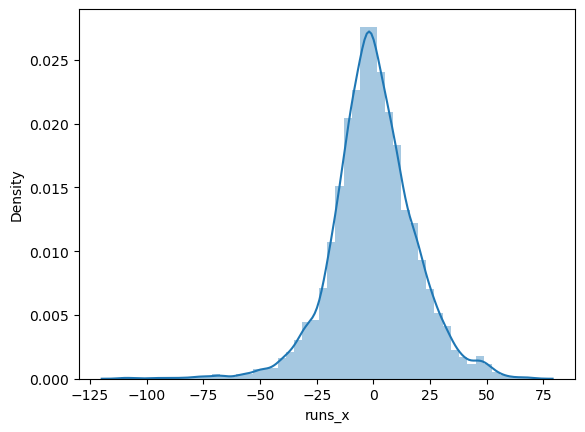

In [43]:
sns.distplot(y_test-prediction)

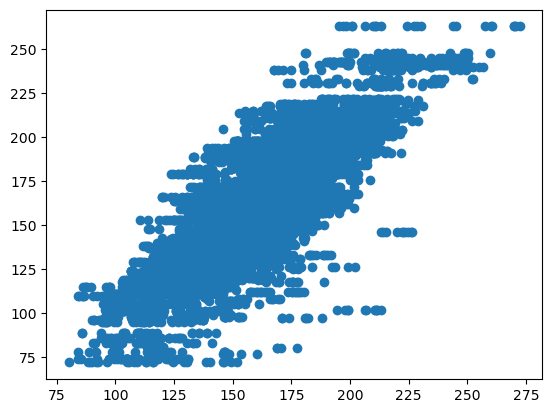

In [44]:
plt.scatter(prediction,y_test)

In [45]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R SQUARED : ',round(metrics.r2_score(y_test,prediction),2))

MAE :  13.637010676604861
MSE :  338.9618933140171
RMSE :  18.41091777489697
R SQUARED :  0.67


In [46]:
pickle.dump(ridge_regressor, open('t-20-ridge_model.pkl','wb'))

In [50]:
a=[[ 70.   ,60. ,  5. ,  6., 30.   ,0. ,  1.,   0. ,  0. , 0. ,  0. ,  0. ,  0. ,  0.,
    0. ,  0. , 0., 0. , 0., 1., 0., 0., 0., 0. ,0.]]

In [51]:
int(ridge_regressor.predict(a))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


141

In [49]:
X.columns

Index(['current_score', 'balls_left', 'wickets_left', 'crr', 'last_five',
       'batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_New Zealand', 'batting_team_Pakistan',
       'batting_team_South Africa', 'batting_team_Sri Lanka',
       'batting_team_West Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New Zealand', 'bowling_team_Pakistan',
       'bowling_team_South Africa', 'bowling_team_Sri Lanka',
       'bowling_team_West Indies'],
      dtype='object')